In [1]:
import numpy as np
import pandas as pd
import time
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib
import os
# %matplotlib notebook
%matplotlib inline

In [2]:
# body_part = "head"
# file_names = ['./data/training_data/head_data_1.log',
#              './data/training_data/head_data_2.log',
#              './data/training_data/head_data_3.log',
#              './data/training_data/head_data_4.log',
#              './data/training_data/head_data_5.log',
#              './data/training_data/head_data_6.log']

body_part = "shoulder_right"
file_names = [
             './data/training_data/shoulder_right_data_6.log',
             './data/training_data/shoulder_right_data_7.log',
             './data/training_data/shoulder_right_data_8.log',
             './data/training_data/shoulder_right_data_9.log',
             './data/training_data/shoulder_right_data_14.log',
             './data/training_data/shoulder_right_data_15.log',
             './data/training_data/shoulder_right_data_16.log',
             './data/training_data/shoulder_right_data_17.log']

# body_part = "shoulder_left"
# file_names = ['./data/training_data/shoulder_left_data_1.log',
#               './data/training_data/shoulder_left_data_2.log',
#               './data/training_data/shoulder_left_data_3.log']

dataset = [pd.read_csv(f, delim_whitespace=True, header=0) for f in file_names]
dataset = [data[(np.abs(stats.zscore(data[["roll", "pitch", "yaw"]])) < 2.75).all(axis=1)] for data in dataset]
dataset_len = [len(data) for data in dataset]
dataset = pd.concat(dataset)

print('%d values'%(len(dataset)))

346086 values


In [3]:
dataset_len

[8241, 67523, 37184, 57790, 12928, 12195, 7290, 142935]

In [4]:
dataset = dataset.values[1:len(dataset)-1,0:]
# np.random.shuffle(dataset)

dataset = dataset[abs(dataset[:,12])!=0.0,:]
dataset = dataset[abs(dataset[:,13])!=0.0,:]
dataset = dataset[abs(dataset[:,14])!=0.0,:]
print('%d values after filtering outliers'%(len(dataset)))

euler_set = dataset[:, 12:15]
print('max euler ' + str(np.amax(euler_set)))
print('min euler ' + str(np.amin(euler_set)))
sensors_set = dataset[:, :12]

346084 values after filtering outliers
max euler 1.411555809406252
min euler -2.2710370734661414


In [5]:
sin_cos_set = np.hstack([np.sin(euler_set), np.cos(euler_set)])

In [6]:
sensors_scaler = MinMaxScaler(feature_range=(-1., 1.))
sensors_set = sensors_scaler.fit_transform(sensors_set)

In [7]:
data_split = 0.8
split_idx = int(len(sensors_set)*data_split)

In [8]:
# look_back = 10

# data_in = []
# data_out = []

# start_idx = 0
# for l in dataset_len:
#     # Ignore the last batch
#     for i in range(start_idx, start_idx+l-look_back*2):
#         data_in.append(sensors_set[i:i+look_back])
#         data_out.append(sin_cos_set[i+1:i+look_back+1])
#     print(len(data_in))
#     start_idx += l

data_in = sensors_set
data_out = sin_cos_set

In [9]:
data_split = 0.8
data_idx = np.arange(len(data_in))
np.random.shuffle(data_idx)
split_idx = int(len(data_in)*data_split)

train_in = np.array(data_in)[data_idx[:split_idx]]
train_out = np.array(data_out)[data_idx[:split_idx]]
test_in = np.array(data_in)[data_idx[split_idx:]]
test_out = np.array(data_out)[data_idx[split_idx:]]

In [10]:
train_in.shape

(276867, 12)

## Train model

In [11]:
from nn_model import NeuralNetworkModel, FFNeuralNetworkModel, LSTMNeuralNetworkModel

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
model_path = './output/'+body_part+'_tanh_2'

if not os.path.exists(model_path):
    os.makedirs(model_path)

model_name = model_path+'/best_model'
joblib.dump(sensors_scaler, model_path+'/scaler.pkl') 

# model = LSTMNeuralNetworkModel(name=body_part, hidden_size=100, look_back=look_back)
model = FFNeuralNetworkModel(name=body_part, hidden_size=100)
model.fit(x=train_in, y=train_out, x_val=test_in, y_val=test_out, save_path=model_name, 
         iteration=500, patience=100, batch_size=1000)

/home/thobotics/anaconda3/envs/tum/lib/python3.6/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/thobotics/anaconda3/envs/tum/lib/python3.6/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


#0000: Traing loss 0.40044, Valid loss 0.19981
#0010: Traing loss 0.02158, Valid loss 0.02072
#0020: Traing loss 0.00888, Valid loss 0.00887
#0030: Traing loss 0.00626, Valid loss 0.00642
#0040: Traing loss 0.00514, Valid loss 0.00525
#0050: Traing loss 0.00447, Valid loss 0.00462
#0060: Traing loss 0.00404, Valid loss 0.00416
#0070: Traing loss 0.00373, Valid loss 0.00386
#0080: Traing loss 0.00352, Valid loss 0.00360
#0090: Traing loss 0.00334, Valid loss 0.00346
#0100: Traing loss 0.00320, Valid loss 0.00332
#0110: Traing loss 0.00307, Valid loss 0.00323
#0120: Traing loss 0.00298, Valid loss 0.00311
#0130: Traing loss 0.00290, Valid loss 0.00303
#0140: Traing loss 0.00280, Valid loss 0.00295
#0150: Traing loss 0.00274, Valid loss 0.00289
#0160: Traing loss 0.00269, Valid loss 0.00283
#0170: Traing loss 0.00262, Valid loss 0.00280
#0180: Traing loss 0.00258, Valid loss 0.00274
#0190: Traing loss 0.00252, Valid loss 0.00267
#0200: Traing loss 0.00250, Valid loss 0.00260
#0210: Traing

In [13]:
def sin_cos_to_angle(sin_cos):
    return np.array([
        np.arctan2(sin_cos[:, 0], sin_cos[:, 3]),
        np.arctan2(sin_cos[:, 1], sin_cos[:, 4]),
        np.arctan2(sin_cos[:, 2], sin_cos[:, 5]),
    ]).T

In [43]:
data = sensors_set[203011:206011]
in_set = data[:, :12] + np.random.normal(0,1,12)*0.1

In [48]:
out_set = model.predict(in_set)
euler_pred = sin_cos_to_angle(out_set)

In [49]:
euler_set_2 = dataset[203011:206011, 12:15]

In [50]:
euler_pred

array([[ 0.43230674,  0.00436566, -0.22672169],
       [ 0.434267  ,  0.00552457, -0.22105518],
       [ 0.4268166 ,  0.00402513, -0.2260952 ],
       ...,
       [ 0.82713884, -0.9655345 ,  0.23594055],
       [ 0.82647103, -0.96394473,  0.2413577 ],
       [ 0.82633495, -0.9650986 ,  0.24085358]], dtype=float32)

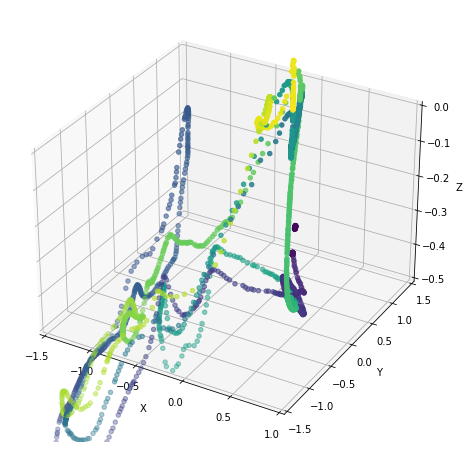

In [51]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(euler_pred[:,0], euler_pred[:,1], euler_pred[:,2], c=np.arange(len(euler_pred)))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-0.5, 0.0])
    
plt.show()